## Linux OS, 구글코랩 사용시 선수작업: 마운트 설정, 그래프의 한글깨짐 방지

### 1. 마운트 설정: 구글 코랩만 실행

In [1]:
# 1. 마운트 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 2. 현재 작업디렉터리 연결
import os
os.chdir("drive/My Drive/py2025_app/")

### 2. 구글 코랩용 그래프 한글깨짐 방지 처리: Linux OS도 같은 방식으로 처리

In [3]:
# 선수작업2-1: 한글나눔폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum* -qq

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-3_all.deb ...
Unpacking fonts-nanum-coding (2.5-3) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-7_all.deb ...
Unpacking fonts-nanum-eco (1.000-7) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20200506-1_all.deb ...
Unpacking fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum-extra (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Setting up fo

In [4]:
# 선수작업2-2: 새로 설치된 폰트 인식시킴
# matplotlib cache directory 비움: 새로 설치된 폰트 인식시킴
!rm ~/.cache/matplotlib -rf

In [ ]:
# 선수작업 2-3
# [런타임]-[세션 다시 시작]메뉴 클릭

In [1]:
# 선수작업2-4: 현재 작업디렉터리 연결
import os
os.chdir("drive/My Drive/py2025_app/")

In [2]:
# 선수작업2-5:  필수라이브러리 로드
import numpy as np
import scipy as sp
import pandas as pd

In [3]:
# 선수작업2-6: 시각화라이브러리 로드
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False  # -기호 깨짐방지

In [4]:
# 선수작업2-7
# 한글폰트 전역 설정
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
# fm._rebuild()

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 기본폰트로 한글 폰트 지정
plt.rc('font', family='NanumBarunGothic')

## 3. 서울시 상권분석

### 3-1. 서울시 상권분석 CSV파일 2개 읽기(영역, 추정매출)

In [14]:
# CSV 파일 경로
file_path_1 = 'data/서울시 상권분석서비스(영역-상권).csv'
file_path_2 = 'data/서울시 상권분석서비스(추정매출-상권)_2024년.csv'

# CSV 파일을 pandas로 읽기
data_1 = pd.read_csv(file_path_1, encoding='euc-kr')
data_2 = pd.read_csv(file_path_2, encoding='euc-kr')

# 첫 5행 확인하기
print(data_1.head())
print(data_2.head())


  상권_구분_코드 상권_구분_코드_명    상권_코드          상권_코드_명  엑스좌표_값  와이좌표_값  자치구_코드  \
0        A       골목상권  3110008  배화여자대학교(박노수미술관)  197093  453418   11110   
1        A       골목상권  3110009            자하문터널  196991  455057   11110   
2        A       골목상권  3110010            평창동서측  197064  456643   11110   
3        A       골목상권  3110017            정독도서관  198581  453781   11110   
4        A       골목상권  3110018           중앙고등학교  198883  453690   11110   

  자치구_코드_명    행정동_코드 행정동_코드_명   영역_면적  
0      종로구  11110515    청운효자동  149264  
1      종로구  11110550      부암동  178306  
2      종로구  11110560      평창동  369415  
3      종로구  11110600      가회동   83855  
4      종로구  11110600      가회동  166872  
   기준_년분기_코드 상권_구분_코드 상권_구분_코드_명    상권_코드  상권_코드_명 서비스_업종_코드 서비스_업종_코드_명  \
0      20241        A       골목상권  3110001   이북5도청사  CS100001       한식음식점   
1      20241        A       골목상권  3110001   이북5도청사  CS100009     호프-간이주점   
2      20241        A       골목상권  3110001   이북5도청사  CS200001      일반교습학원   
3    

### 3-2. 도봉구 매출 상위 10위 상권 분석

도봉구 매출 상위 10개 상권:
상권_코드_명
창동역              156,866
도봉산입구             79,176
쌍문시장(쌍문역골목시장)     66,600
방학동도깨비시장          62,257
방학역 1번            53,176
쌍문역1번(쌍리단길)       52,780
창동역상점가            41,977
신창초등학교            40,168
쌍문2동우체국           35,935
쌍문역동측상점가          34,809
Name: 당월_매출_금액, dtype: object


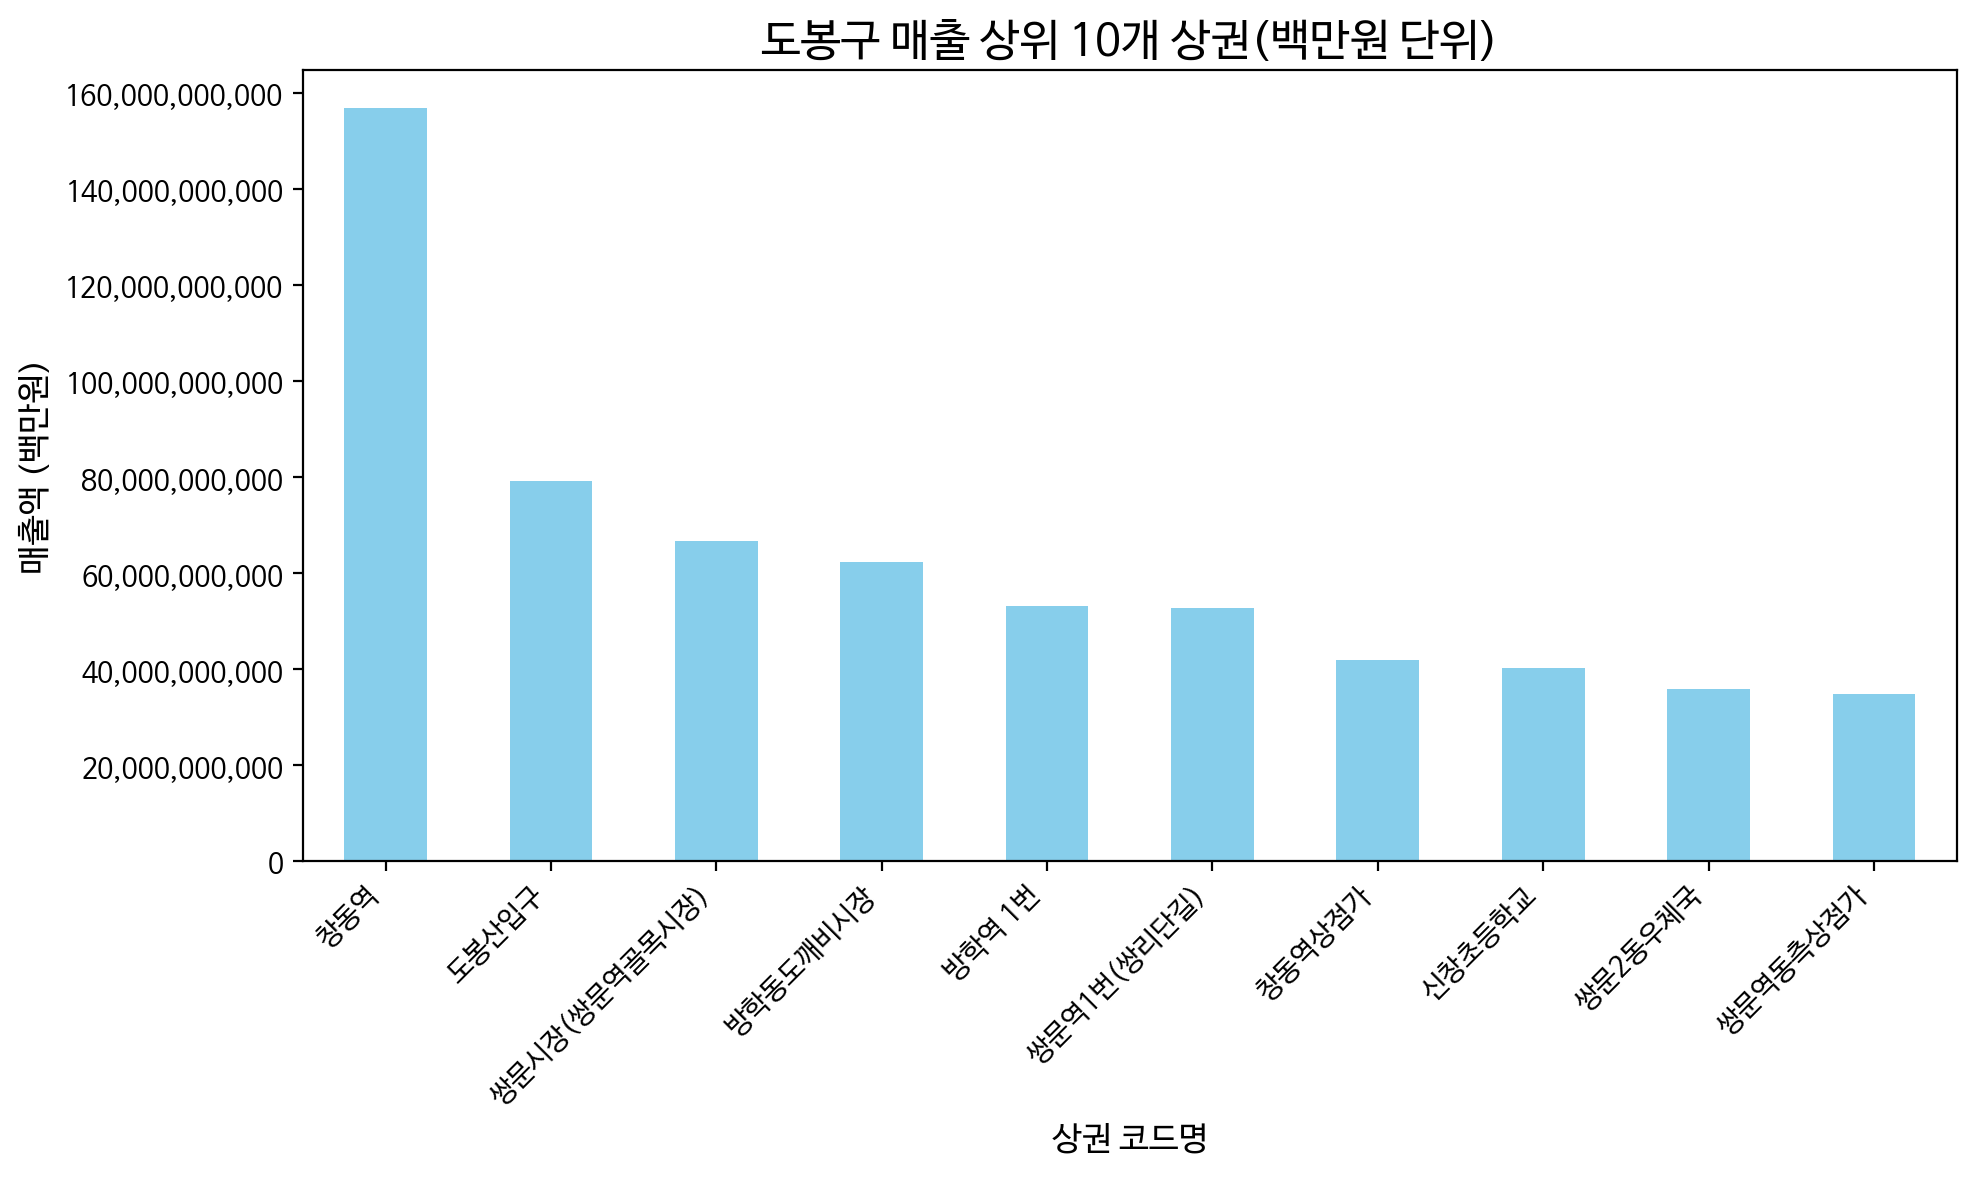

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# 도봉구 데이터 필터링
dobong_data = data_1[data_1['자치구_코드_명'] == '도봉구']

# 도봉구 상권 코드 추출
dobong_gwangon_codes = dobong_data['상권_코드'].unique()

# 도봉구 상권의 매출 데이터 추출
dobong_sales_data = data_2[data_2['상권_코드'].isin(dobong_gwangon_codes)]

# 상권 코드명별로 매출 합산
grouped_sales = dobong_sales_data.groupby('상권_코드_명')['당월_매출_금액'].sum()

# 매출액 기준 내림차순 정렬하여 상위 10개 상권 추출
top_10_sales = grouped_sales.sort_values(ascending=False).head(10)

# 매출액을 백만원 단위로 변환 후, 천 단위 쉼표 추가하고 소수점 제거
top_10_sales_formatted = (top_10_sales / 1_000_000).apply(lambda x: f'{int(x):,}')

# 결과 출력
print("도봉구 매출 상위 10개 상권:")
print(top_10_sales_formatted)

# 상위 10개 상권의 매출 시각화
plt.figure(figsize=(10, 6))

# bar plot으로 상위 10개 상권 매출을 시각화
top_10_sales.plot(kind='bar', color='skyblue')

# 천 단위 쉼표 추가
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# 그래프 제목과 레이블 설정
plt.title('도봉구 매출 상위 10개 상권(백만원 단위)', fontsize=16)
plt.xlabel('상권 코드명', fontsize=12)
plt.ylabel('매출액 (백만원)', fontsize=12)

# x축 레이블 회전
plt.xticks(rotation=45, ha='right')

# 그래프 표시
plt.tight_layout()
plt.show()


### 3-3. 도봉구 연령별 성별 매출액

연령대별 성별 매출액 (백만원 단위):
         남성   여성
연령대             
10대     102   70
20대     117   92
30대      23    9
40대       5    6
50대     247  206
60대 이상   67   81


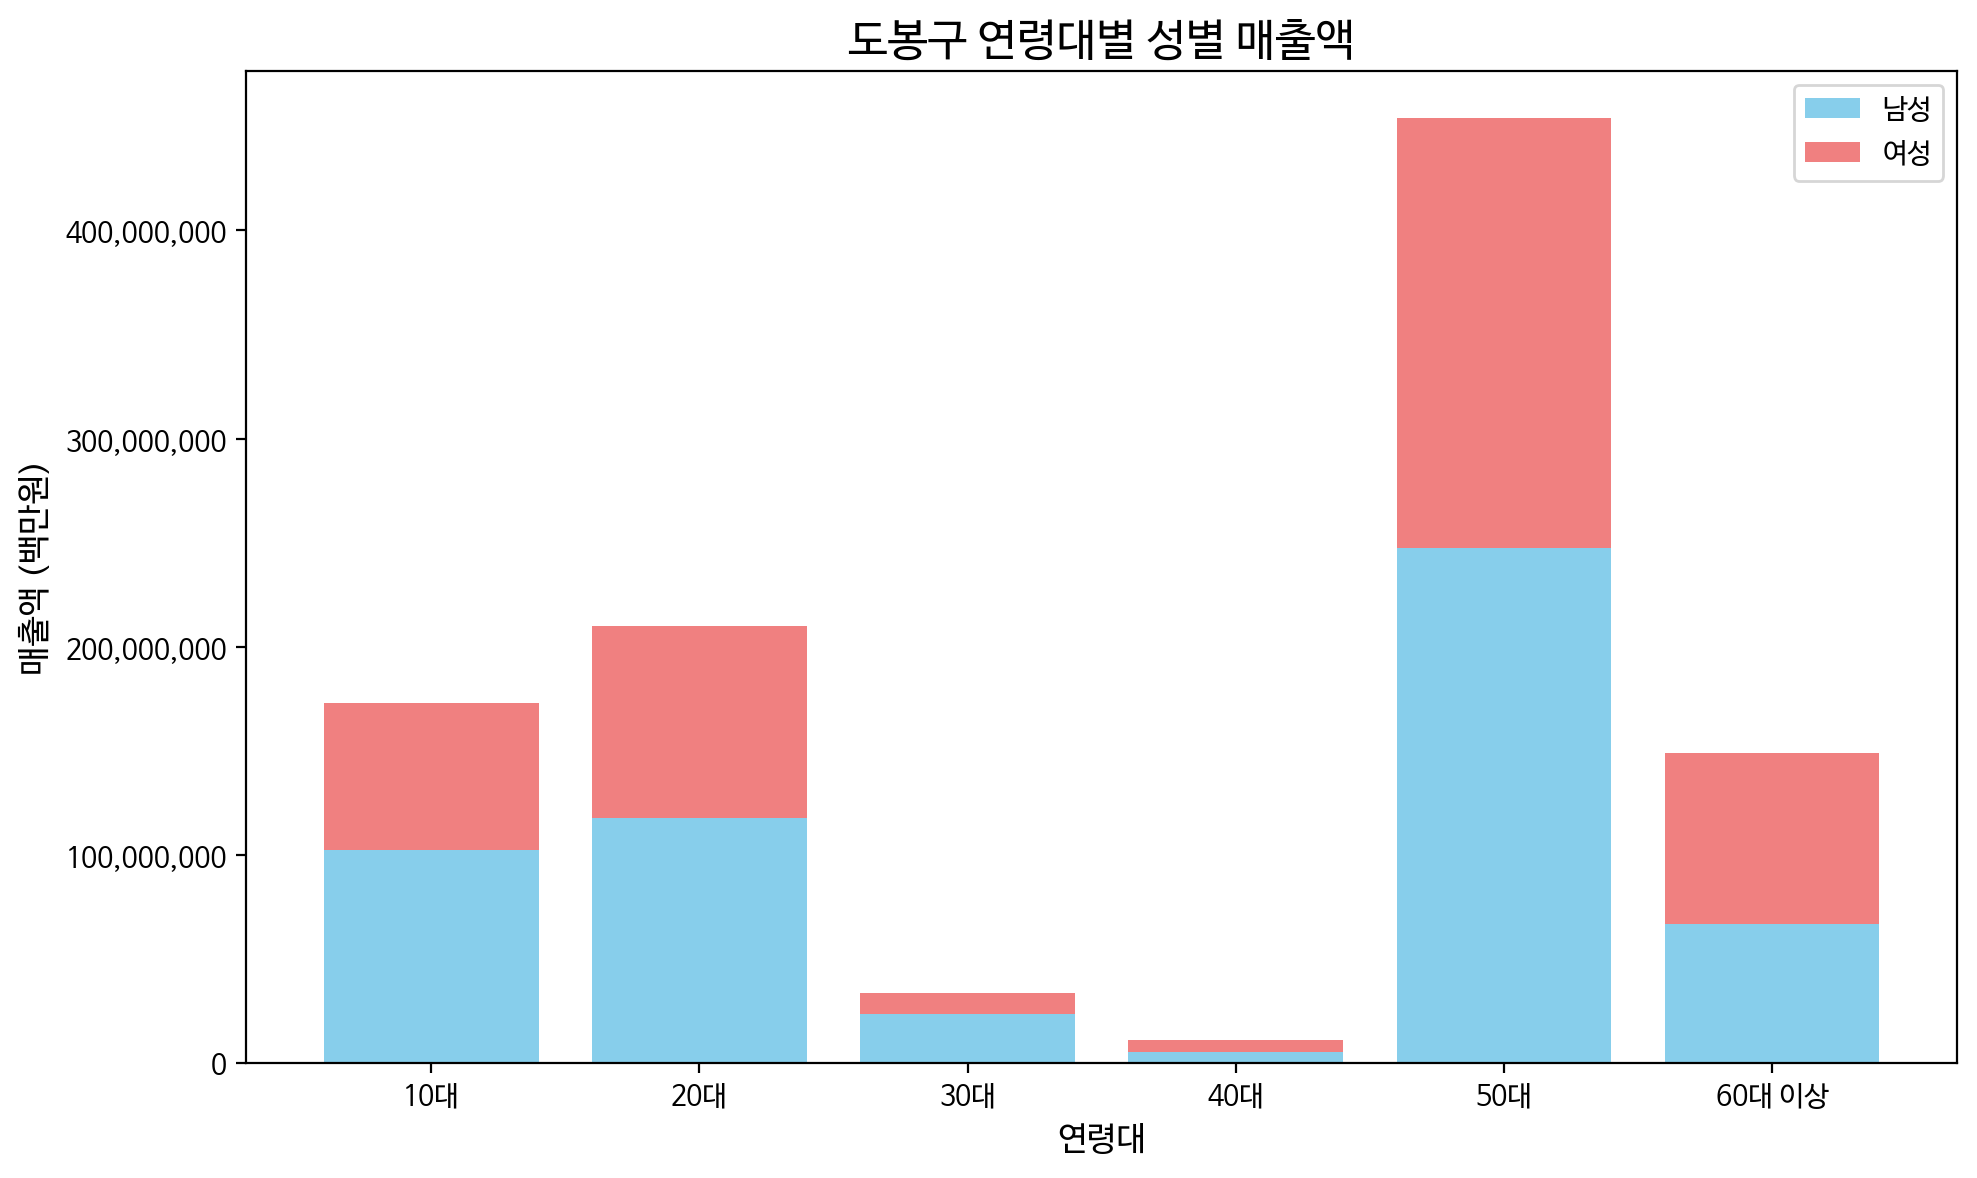

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# 도봉구 데이터 필터링
dobong_data = data_1[data_1['자치구_코드_명'] == '도봉구']

# 도봉구 상권 코드 추출
dobong_gwangon_codes = dobong_data['상권_코드'].unique()

# 도봉구 상권의 매출 데이터 추출
dobong_sales_data = data_2[data_2['상권_코드'].isin(dobong_gwangon_codes)]

# 연령대별 매출액 및 성별 매출액 컬럼을 가져옴
# '남성_매출_금액'과 '여성_매출_금액'을 활용하여 계산
age_gender_sales = dobong_sales_data[['연령대_10_매출_금액', '연령대_20_매출_금액', '연령대_30_매출_금액',
                                      '연령대_40_매출_금액', '연령대_50_매출_금액', '연령대_60_이상_매출_금액',
                                      '남성_매출_금액', '여성_매출_금액']]

# 연령대별 성별 매출액 계산
# 연령대별 성별 매출액을 계산 (각 연령대에서 남성과 여성 매출액을 구체적으로 합산)
age_groups = ['10대', '20대', '30대', '40대', '50대', '60대 이상']

# 각 연령대별 남성 및 여성 매출액 합산
male_sales = []
female_sales = []

for i, age_group in enumerate(age_groups):
    male_sales.append(age_gender_sales[f'남성_매출_금액'].iloc[i])
    female_sales.append(age_gender_sales[f'여성_매출_금액'].iloc[i])

# 결과 출력
print("연령대별 성별 매출액 (백만원 단위):")

# 연령대별 성별 매출액을 출력할 때 연령대 인덱스를 추가
total_sales_by_age_gender = pd.DataFrame({
    '연령대': age_groups,  # 연령대 추가
    '남성': male_sales,
    '여성': female_sales
})
total_sales_by_age_gender.set_index('연령대', inplace=True)  # 연령대를 인덱스로 설정

# 백만원 단위로 변환하고 소숫점 제거 후 천 단위 쉼표 추가
total_sales_by_age_gender = total_sales_by_age_gender / 1_000_000

# 'apply'를 사용하여 각 열에 대해 천 단위 쉼표를 추가하고 소숫점 제거
total_sales_by_age_gender = total_sales_by_age_gender.apply(lambda x: x.apply(lambda y: f'{int(y):,}'))

print(total_sales_by_age_gender)  # 소숫점 없이 출력


############################################################

# 시각화: 연령대별 성별 매출액
plt.figure(figsize=(10, 6))

# 남성, 여성 매출을 겹쳐서 표시 (누적 바 차트)
plt.bar(age_groups, male_sales, label='남성', color='skyblue')
plt.bar(age_groups, female_sales, bottom=male_sales, label='여성', color='lightcoral')

# 그래프 제목과 레이블 설정
plt.title('도봉구 연령대별 성별 매출액', fontsize=16)
plt.xlabel('연령대', fontsize=12)
plt.ylabel('매출액 (백만원)', fontsize=12)

# 천 단위 쉼표 추가
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# 범례 설정
plt.legend()

# 그래프 표시
plt.tight_layout()
plt.show()


### 3-4. 도봉구 시간대별 매출액 추세

시간대별 매출 (백만원 단위):
시간대_00~06_매출_금액     30,110
시간대_06~11_매출_금액    135,468
시간대_11~14_매출_금액    251,330
시간대_14~17_매출_금액    254,941
시간대_17~21_매출_금액    306,205
시간대_21~24_매출_금액     81,915
dtype: object


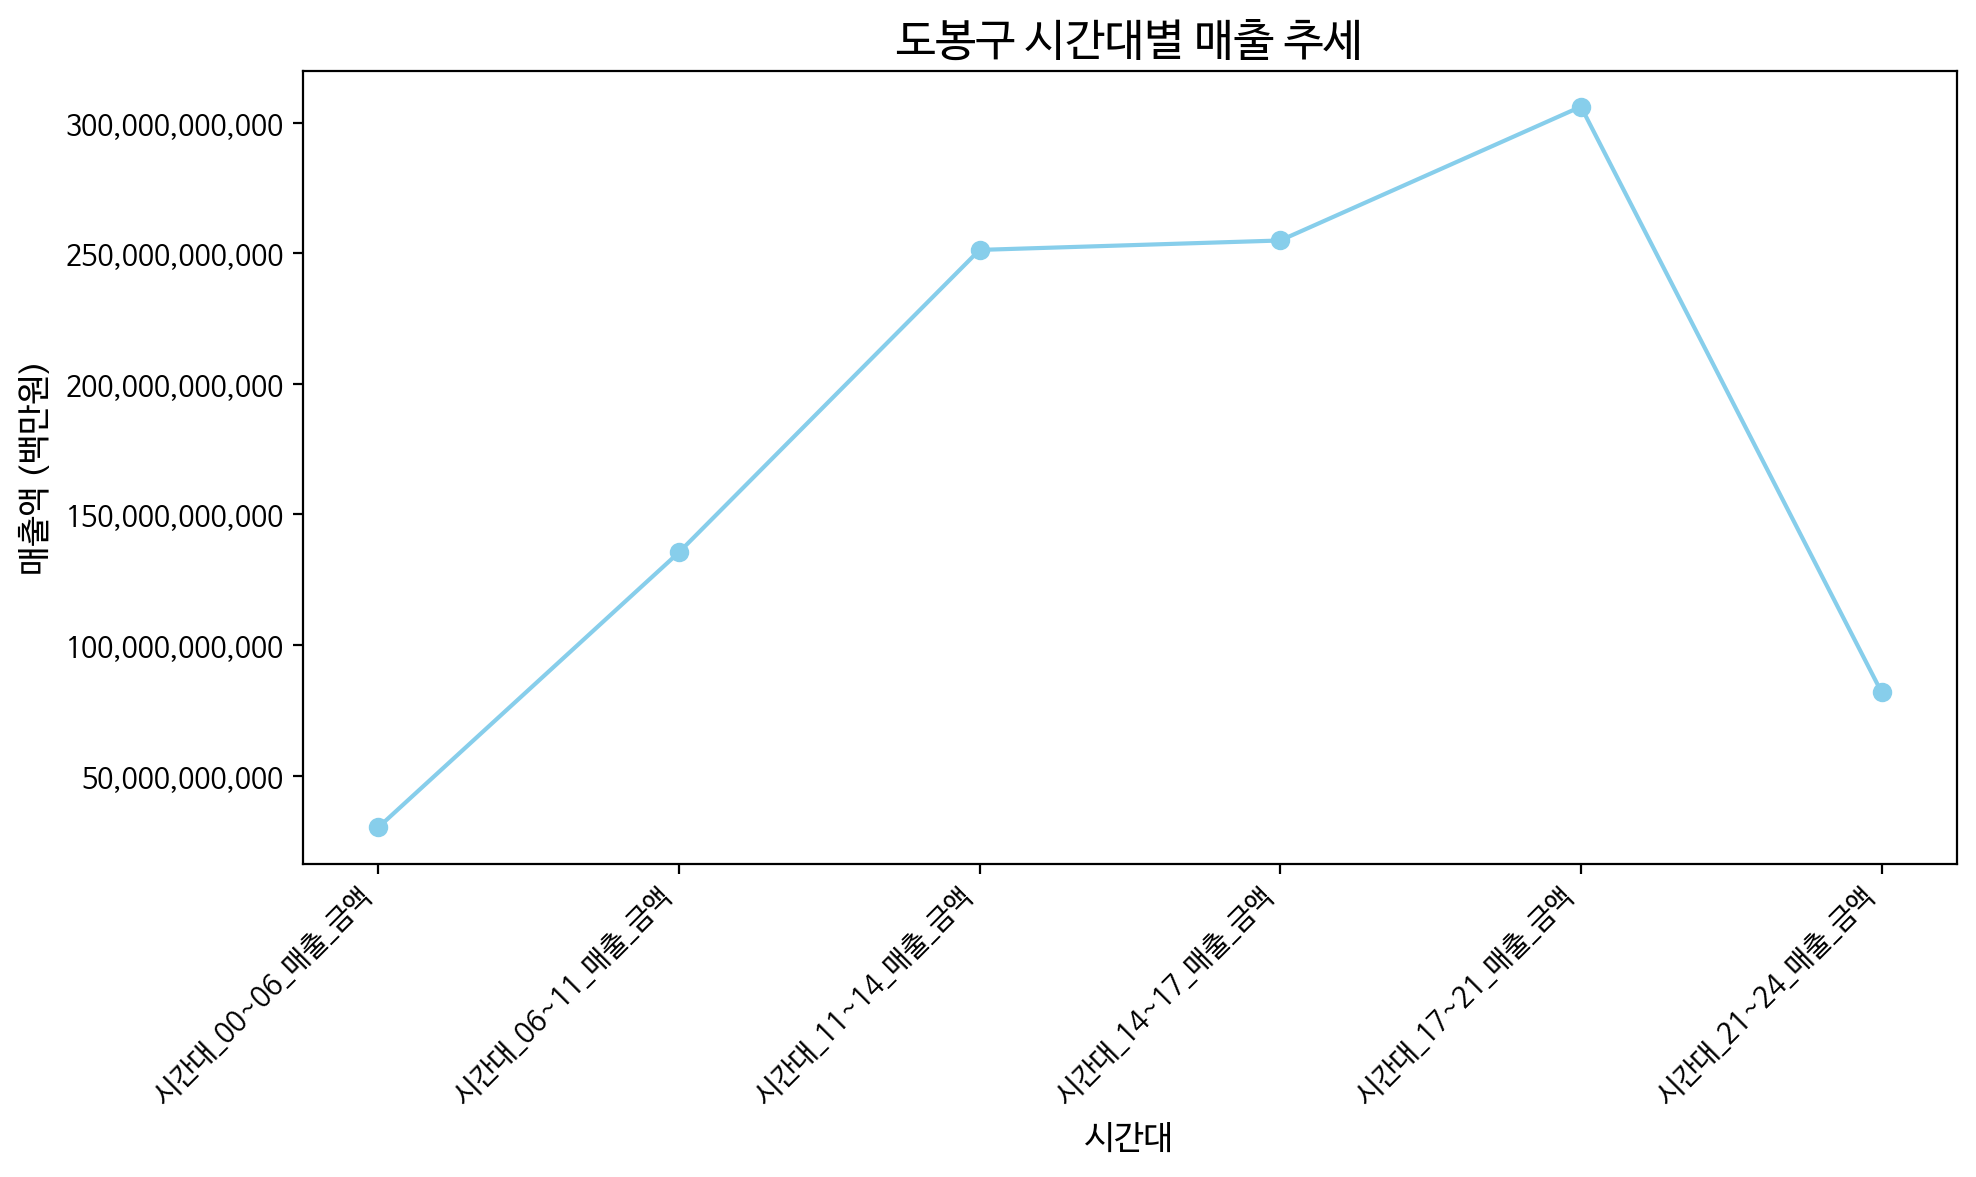

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# 도봉구 데이터 필터링
dobong_data = data_1[data_1['자치구_코드_명'] == '도봉구']

# 도봉구 상권 코드 추출
dobong_gwangon_codes = dobong_data['상권_코드'].unique()

# 도봉구 상권의 매출 데이터 추출
dobong_sales_data = data_2[data_2['상권_코드'].isin(dobong_gwangon_codes)]

# 시간대별 매출 데이터 추출
time_sales = dobong_sales_data[['시간대_00~06_매출_금액', '시간대_06~11_매출_금액', '시간대_11~14_매출_금액',
                                '시간대_14~17_매출_금액', '시간대_17~21_매출_금액', '시간대_21~24_매출_금액']]

# 시간대별 매출 합산
time_sales_sum = time_sales.sum()

# 결과 출력 (소숫점 제거 후 천 단위 쉼표 추가)
print("시간대별 매출 (백만원 단위):")
print(time_sales_sum.apply(lambda x: f'{int(x / 1_000_000):,}'))  # 백만원 단위로 변환 후 소숫점 제거하고 천 단위 쉼표 추가

# 시간대별 매출 시각화
plt.figure(figsize=(10, 6))

# 시간대별 매출을 시각화
time_sales_sum.plot(kind='line', marker='o', color='skyblue')

# 그래프 제목과 레이블 설정
plt.title('도봉구 시간대별 매출 추세', fontsize=16)
plt.xlabel('시간대', fontsize=12)
plt.ylabel('매출액 (백만원)', fontsize=12)

# x축 레이블 설정
plt.xticks(rotation=45, ha='right')

# 천 단위 쉼표 추가
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# 그래프 표시
plt.tight_layout()
plt.show()


### 3-5. 도봉구 요일별 매출액 추세

요일별 매출 (백만원 단위):
월요일_매출_금액    159,159
화요일_매출_금액    157,727
수요일_매출_금액    144,173
목요일_매출_금액    153,573
금요일_매출_금액    172,202
토요일_매출_금액    167,378
일요일_매출_금액    105,757
dtype: object


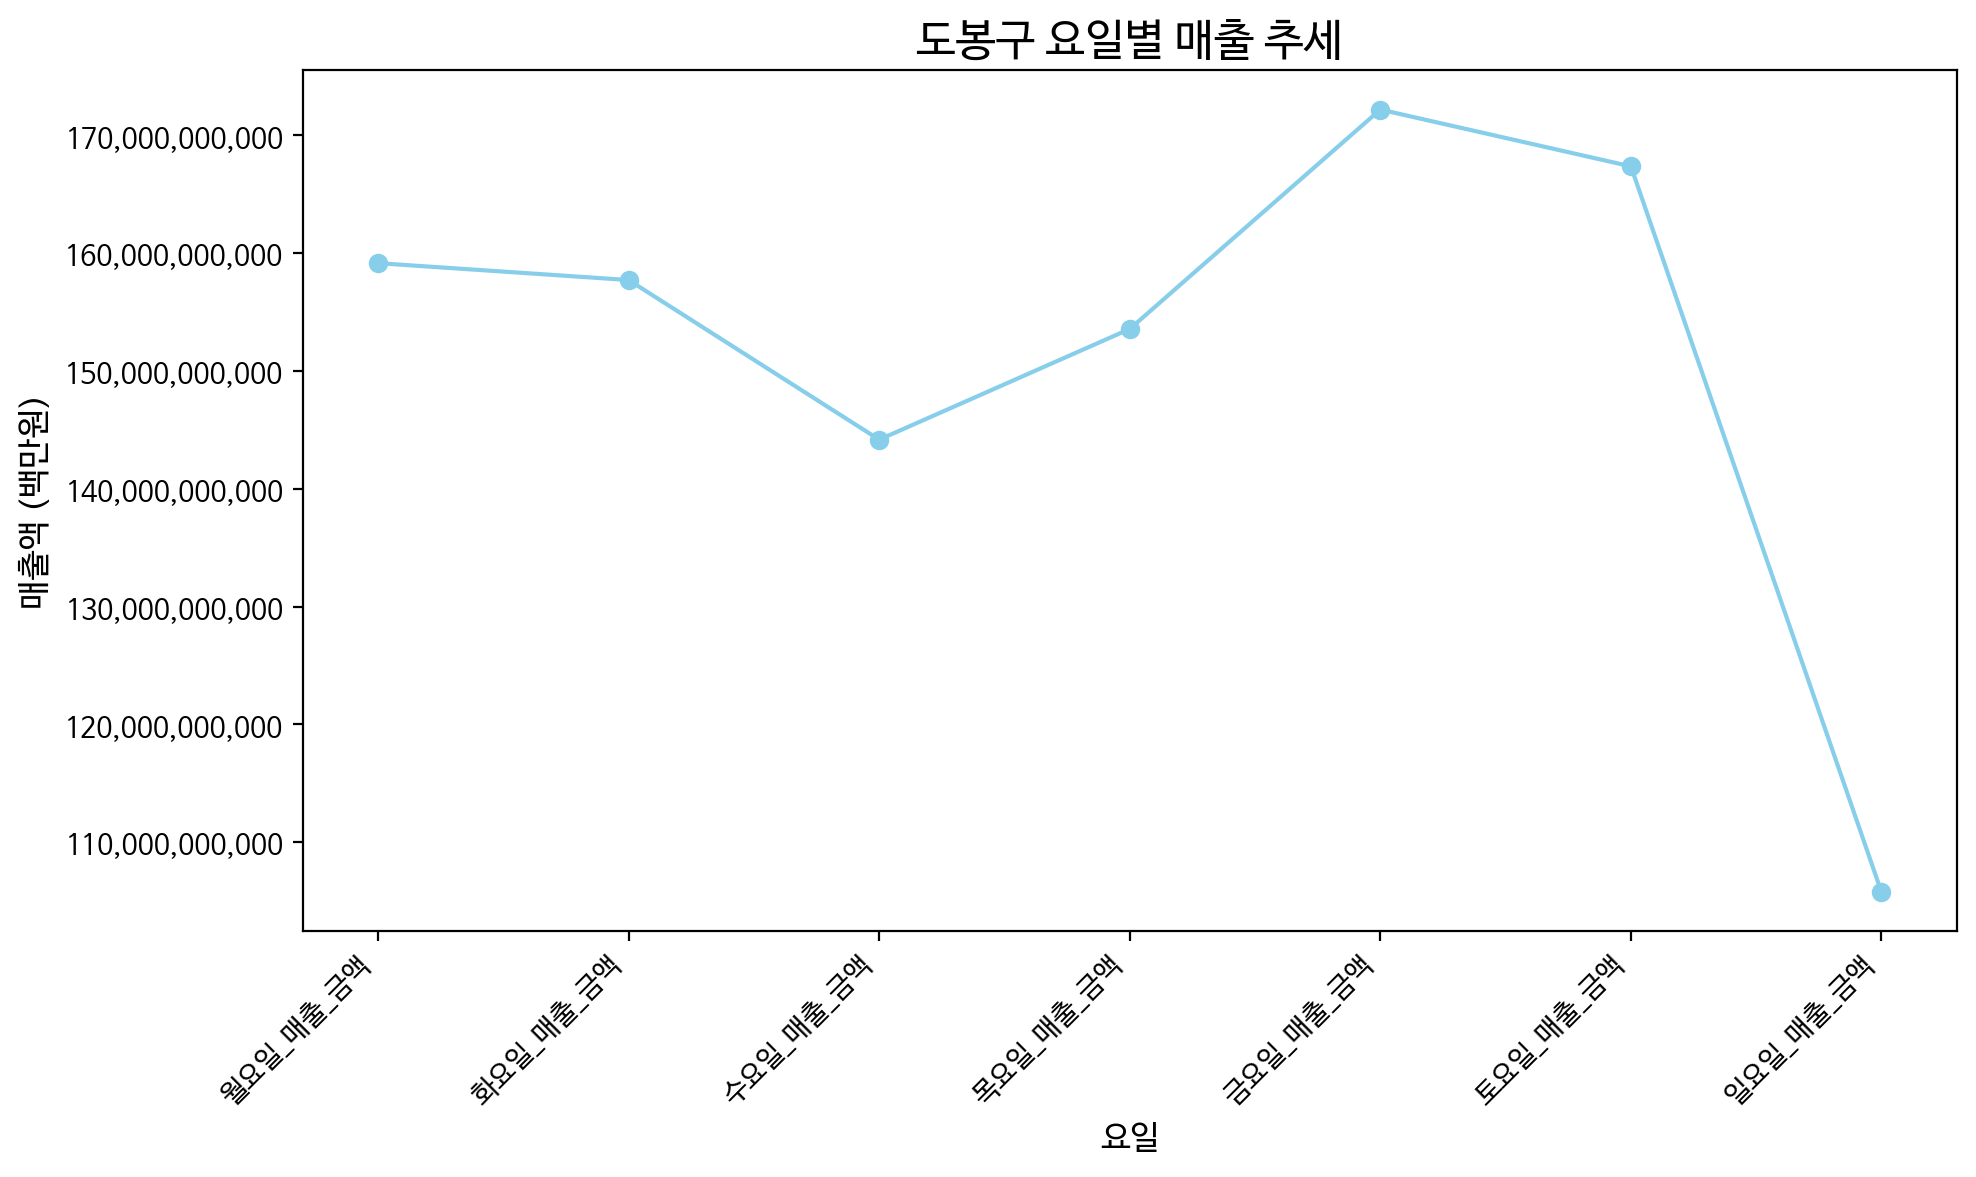

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


# 도봉구 데이터 필터링
dobong_data = data_1[data_1['자치구_코드_명'] == '도봉구']

# 도봉구 상권 코드 추출
dobong_gwangon_codes = dobong_data['상권_코드'].unique()

# 도봉구 상권의 매출 데이터 추출
dobong_sales_data = data_2[data_2['상권_코드'].isin(dobong_gwangon_codes)]

# 요일별 매출 데이터 추출
day_sales = dobong_sales_data[['월요일_매출_금액', '화요일_매출_금액', '수요일_매출_금액',
                               '목요일_매출_금액', '금요일_매출_금액', '토요일_매출_금액', '일요일_매출_금액']]

# 요일별 매출 합산
day_sales_sum = day_sales.sum()

# 결과 출력 (소숫점 제거 및 천 단위 쉼표 추가)
print("요일별 매출 (백만원 단위):")
# 소숫점 제거하고, 천 단위 쉼표를 추가하여 출력
print(day_sales_sum.apply(lambda x: f'{int(x / 1_000_000):,}'))  # 백만원 단위로 변환 후 소숫점 제거하고 천 단위 쉼표 추가

# 시각화: 요일별 매출 추세
plt.figure(figsize=(10, 6))

# 요일별 매출을 시각화
day_sales_sum.plot(kind='line', marker='o', color='skyblue')

# 그래프 제목과 레이블 설정
plt.title('도봉구 요일별 매출 추세', fontsize=16)
plt.xlabel('요일', fontsize=12)
plt.ylabel('매출액 (백만원)', fontsize=12)

# x축 레이블 설정
plt.xticks(rotation=45, ha='right')

# 천 단위 쉼표 추가
formatter = FuncFormatter(lambda x, pos: f'{int(x):,}')
plt.gca().yaxis.set_major_formatter(formatter)

# 그래프 표시
plt.tight_layout()
plt.show()
